In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(r'/content/final_mumbai_data.csv')

In [ ]:
df

,Area,Status,Floor,Transaction,Furnishing,Society,Car Parking,Bathroom,Balcony,price,BHK_type,Address,Type,Main Road,Pool,Garden/Park,pricepersqft
0,578.0,Under Construction,0.0,New Property,Unfurnished,Yashwant Circle,1 Covered,1.0,2.0,0.72,1,Mumbai,Apartment,0,0,0,1245.67
1,435.0,Ready to Move,0.0,New Property,Unfurnished,Evershine Amavi 303,Unknown,1.0,1.0,0.45,1,Unknown,Apartment,0,0,0,1034.48
2,537.0,Under Construction,0.0,New Property,Unfurnished,Codename Triumph Tower 1,Unknown,2.0,1.0,1.50,1,Mumbai,Apartment,0,0,0,2793.30
3,400.0,Under Construction,0.0,New Property,Unfurnished,SD Siennaa,Unknown,1.0,1.0,1.30,1,Mumbai,Apartment,0,0,0,3250.00
4,486.0,Under Construction,0.0,New Property,Unfurnished,Adityaraj Fortune,Unknown,2.0,1.0,1.17,1,Mumbai,Apartment,0,0,0,2407.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,4500.0,Ready to Move,0.0,Resale,Semi-Furnished,Unknown,2 Covered,5.0,2.0,14.00,4,Pali Hill Mumbai,House,1,0,1,3111.11
3897,7000.0,Ready to Move,0.0,New Property,Furnished,Lodha Maison,Unknown,5.0,3.0,16.00,5,Chembur East Mumbai,House,1,1,1,2285.71
3898,7600.0,Ready to Move,0.0,Resale,Unfurnished,Lodha Maison,Unknown,5.0,3.0,10.00,6,Deonar Chembur Mumbai,House,1,1,1,1315.79
3899,6000.0,Ready to Move,0.0,Resale,Semi-Furnished,Unknown,1 Covered,5.0,4.0,36.00,6,Worli Mumbai,House,1,0,0,6000.00


In [ ]:
df["Address"].replace("Unknown","Mumbai",inplace=True)

<ipython-input-7-e8f70c1a82c2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Address"].replace("Unknown","Mumbai",inplace=True)


In [ ]:
train_df=df.drop(columns=(["Society","pricepersqft"]))

In [ ]:
train_df

,Area,Status,Floor,Transaction,Furnishing,Car Parking,Bathroom,Balcony,price,BHK_type,Address,Type,Main Road,Pool,Garden/Park
0,578.0,Under Construction,0.0,New Property,Unfurnished,1 Covered,1.0,2.0,0.72,1,Mumbai,Apartment,0,0,0
1,435.0,Ready to Move,0.0,New Property,Unfurnished,Unknown,1.0,1.0,0.45,1,Mumbai,Apartment,0,0,0
2,537.0,Under Construction,0.0,New Property,Unfurnished,Unknown,2.0,1.0,1.50,1,Mumbai,Apartment,0,0,0
3,400.0,Under Construction,0.0,New Property,Unfurnished,Unknown,1.0,1.0,1.30,1,Mumbai,Apartment,0,0,0
4,486.0,Under Construction,0.0,New Property,Unfurnished,Unknown,2.0,1.0,1.17,1,Mumbai,Apartment,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,4500.0,Ready to Move,0.0,Resale,Semi-Furnished,2 Covered,5.0,2.0,14.00,4,Pali Hill Mumbai,House,1,0,1
3897,7000.0,Ready to Move,0.0,New Property,Furnished,Unknown,5.0,3.0,16.00,5,Chembur East Mumbai,House,1,1,1
3898,7600.0,Ready to Move,0.0,Resale,Unfurnished,Unknown,5.0,3.0,10.00,6,Deonar Chembur Mumbai,House,1,1,1
3899,6000.0,Ready to Move,0.0,Resale,Semi-Furnished,1 Covered,5.0,4.0,36.00,6,Worli Mumbai,House,1,0,0


In [ ]:
train_df["Floor"].value_counts()

,count
Floor,
0.0,895
5.0,274
4.0,229
1.0,201
7.0,200
...,...
52.0,1
69.0,1
60.0,1


In [ ]:
def cvt(x):
  if x<=3:
    return "low level"
  elif x>3 and x<=10:
    return "medium level"
  else:
    return "high level"

In [ ]:
train_df["Floor"]=train_df["Floor"].apply(cvt)

In [ ]:
train_df["Floor"].value_counts()

,count
Floor,
low level,1501
medium level,1335
high level,1065


In [ ]:
train_df["luxury_type"]=train_df["Main Road"] + train_df["Pool"] + train_df["Garden/Park"]

In [ ]:
train_df["luxury_type"].value_counts()

,count
luxury_type,
1,1353
0,1309
2,756
3,483


In [ ]:
def luxury(x):
  if x> 2:
    return "luxury"
  elif x <= 2 and x >= 1:
    return "semi luxury"
  else:
    return "non luxury"

In [ ]:
train_df["luxury_type"]=train_df["luxury_type"].apply(luxury)

In [ ]:
train_df.drop(columns=(["Main Road","Pool","Garden/Park"]),inplace=True)

In [ ]:
train_df

,Area,Status,Floor,Transaction,Furnishing,Car Parking,Bathroom,Balcony,price,BHK_type,Address,Type,luxury_type
0,578.0,Under Construction,low level,New Property,Unfurnished,1 Covered,1.0,2.0,0.72,1,Mumbai,Apartment,non luxury
1,435.0,Ready to Move,low level,New Property,Unfurnished,Unknown,1.0,1.0,0.45,1,Mumbai,Apartment,non luxury
2,537.0,Under Construction,low level,New Property,Unfurnished,Unknown,2.0,1.0,1.50,1,Mumbai,Apartment,non luxury
3,400.0,Under Construction,low level,New Property,Unfurnished,Unknown,1.0,1.0,1.30,1,Mumbai,Apartment,non luxury
4,486.0,Under Construction,low level,New Property,Unfurnished,Unknown,2.0,1.0,1.17,1,Mumbai,Apartment,non luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,4500.0,Ready to Move,low level,Resale,Semi-Furnished,2 Covered,5.0,2.0,14.00,4,Pali Hill Mumbai,House,semi luxury
3897,7000.0,Ready to Move,low level,New Property,Furnished,Unknown,5.0,3.0,16.00,5,Chembur East Mumbai,House,luxury
3898,7600.0,Ready to Move,low level,Resale,Unfurnished,Unknown,5.0,3.0,10.00,6,Deonar Chembur Mumbai,House,luxury
3899,6000.0,Ready to Move,low level,Resale,Semi-Furnished,1 Covered,5.0,4.0,36.00,6,Worli Mumbai,House,semi luxury


In [ ]:
train_df.to_csv("mumbai full n final",index=False)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']


[array(['Ready to Move', 'Under Construction'], dtype=object)]
[array(['high level', 'low level', 'medium level'], dtype=object)]
[array(['New Property', 'Other', 'Resale'], dtype=object)]
[array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)]
[array(['1 Covered', '1 Open', '2 Covered', '2 Open', 'Covered', 'Opened',
       'Unknown'], dtype=object)]
[array([' Mumbai', '400061 Mumbai', 'A N hights Mumbai',
       'Aasangaon Mumbai', 'Abhyudaya Nagar Mumbai', 'Agripada Mumbai',
       'Aksa Gaon Mumbai', 'Akurli Nagar Mumbai', 'Altamount Road Mumbai',
       'Amar Nagar Mulund West Mumbai', 'Amaryllis Mumbai',
       'Ambivali Mumbai', 'Amboli Mumbai',
       'Amrut Nagar Ghatkopar West Mumbai',
       'Anand Nagar Santacruz East Mumbai', 'Anantraj apartment Mumbai',
       'Andheri East Mumbai', 'Andheri Mumbai', 'Andheri West Mumbai',
       'Antop Hill Mumbai', 'Asangaon Mumbai',
       'Ashok Nagar Kandivali East Mumbai',
       'Ashok Nagar Mulund West Mumbai', 'Asho

In [ ]:
X_label

,Area,Status,Floor,Transaction,Furnishing,Car Parking,Bathroom,Balcony,BHK_type,Address,Type,luxury_type
0,578.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,1,0.0,0.0,1.0
1,435.0,0.0,1.0,0.0,2.0,6.0,1.0,1.0,1,266.0,0.0,1.0
2,537.0,1.0,1.0,0.0,2.0,6.0,2.0,1.0,1,0.0,0.0,1.0
3,400.0,1.0,1.0,0.0,2.0,6.0,1.0,1.0,1,0.0,0.0,1.0
4,486.0,1.0,1.0,0.0,2.0,6.0,2.0,1.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3896,4500.0,0.0,1.0,2.0,1.0,2.0,5.0,2.0,4,293.0,1.0,2.0
3897,7000.0,0.0,1.0,0.0,0.0,6.0,5.0,3.0,5,72.0,1.0,0.0
3898,7600.0,0.0,1.0,2.0,2.0,6.0,5.0,3.0,6,95.0,1.0,0.0
3899,6000.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6,434.0,1.0,2.0


In [ ]:
y_label

,price
0,0.72
1,0.45
2,1.50
3,1.30
4,1.17
...,...
3896,14.00
3897,16.00
3898,10.00
3899,36.00


In [ ]:
import seaborn as sns

<Axes: >

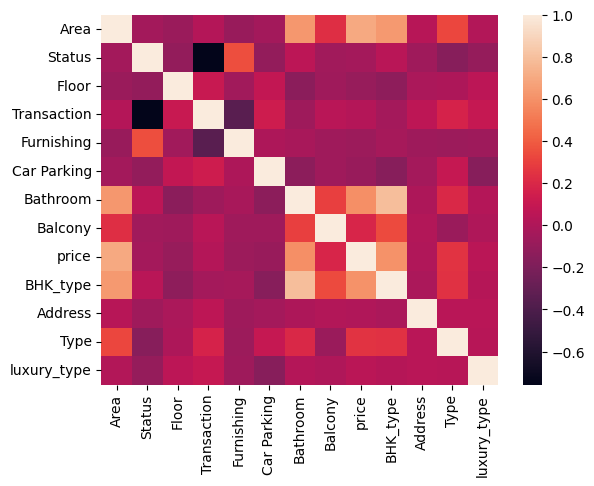

In [ ]:
 sns.heatmap(data_label_encoded.corr())

In [ ]:
data_label_encoded

,Area,Status,Floor,Transaction,Furnishing,Car Parking,Bathroom,Balcony,price,BHK_type,Address,Type,luxury_type
0,578.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,0.72,1,0.0,0.0,1.0
1,435.0,0.0,1.0,0.0,2.0,6.0,1.0,1.0,0.45,1,266.0,0.0,1.0
2,537.0,1.0,1.0,0.0,2.0,6.0,2.0,1.0,1.50,1,0.0,0.0,1.0
3,400.0,1.0,1.0,0.0,2.0,6.0,1.0,1.0,1.30,1,0.0,0.0,1.0
4,486.0,1.0,1.0,0.0,2.0,6.0,2.0,1.0,1.17,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,4500.0,0.0,1.0,2.0,1.0,2.0,5.0,2.0,14.00,4,293.0,1.0,2.0
3897,7000.0,0.0,1.0,0.0,0.0,6.0,5.0,3.0,16.00,5,72.0,1.0,0.0
3898,7600.0,0.0,1.0,2.0,2.0,6.0,5.0,3.0,10.00,6,95.0,1.0,0.0
3899,6000.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,36.00,6,434.0,1.0,2.0


In [ ]:
fi_df1 = data_label_encoded.corr()['price'].iloc[:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,Area,0.698976
1,Status,-0.038407
2,Floor,-0.094677
3,Transaction,0.020618
4,Furnishing,-0.077013
5,Car Parking,-0.087986
6,Bathroom,0.593816
7,Balcony,0.189302
8,price,1.000000
9,BHK_type,0.602396


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
0,Area,0.638801
9,Address,0.111483
8,BHK_type,0.091864
6,Bathroom,0.034605
7,Balcony,0.029856
5,Car Parking,0.029212
4,Furnishing,0.019178
11,luxury_type,0.016185
2,Floor,0.009780
10,Type,0.008292


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
0,Area,0.698307
8,BHK_type,0.128953
9,Address,0.104089
6,Bathroom,0.034713
7,Balcony,0.013048
5,Car Parking,0.011558
11,luxury_type,0.003086
10,Type,0.002915
3,Transaction,0.001643
2,Floor,0.001286


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
0,Area,0.579958
8,BHK_type,0.135763
9,Address,0.053797
5,Car Parking,0.017344
6,Bathroom,0.014443
4,Furnishing,0.007551
2,Floor,0.001807
1,Status,0.001058
10,Type,-0.000162
11,luxury_type,-0.001405


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
0,Area,1.792353
8,BHK_type,0.636401
6,Bathroom,0.532892
11,luxury_type,0.097073
10,Type,0.027902
3,Transaction,0.015036
9,Address,-0.034936
4,Furnishing,-0.043257
2,Floor,-0.051854
5,Car Parking,-0.052521


In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
0,Area,0.634247
9,Address,0.118876
8,BHK_type,0.081851
6,Bathroom,0.042536
7,Balcony,0.028459
5,Car Parking,0.025516
4,Furnishing,0.019929
11,luxury_type,0.014888
2,Floor,0.010768
10,Type,0.009588


In [ ]:
# Train a linear regression model on the label-encoded and standardized training data

from sklearn.linear_model import LinearRegression

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
0,Area,1.796623
8,BHK_type,0.641159
6,Bathroom,0.537828
11,luxury_type,0.104615
10,Type,0.031828
3,Transaction,0.021346
9,Address,-0.046911
4,Furnishing,-0.050024
5,Car Parking,-0.062108
2,Floor,-0.062490


In [ ]:
!pip install shap


In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.24940559e+00, -2.23171997e-02,  4.97601587e-03, ...,
         9.91619166e-02,  4.04811144e-02, -5.96562988e-02],
       [-1.23460625e+00, -2.98491910e-02, -2.42783128e-02, ...,
        -1.78135193e-01,  3.35054693e-02, -1.04554192e-01],
       [-1.10215494e+00,  2.53893749e-03, -3.65652422e-03, ...,
         2.81900688e-01,  5.62233706e-02, -4.25612958e-02],
       ...,
       [ 1.23952268e+01,  1.85186741e-02, -2.11038800e-02, ...,
        -3.78905865e+00, -1.76974627e-01,  5.03932436e-01],
       [ 2.08758550e+01,  6.49875795e-03, -2.35449157e-02, ...,
         2.32962947e+00, -1.33172573e-01, -1.07822210e-01],
       [ 2.06083529e+01,  2.11414357e-02, -2.07604216e-02, ...,
         1.75942156e-01, -1.59315870e-01,  1.56342577e+00]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
0,Area,1.415931
8,BHK_type,0.380602
9,Address,0.237805
5,Car Parking,0.107443
10,Type,0.079203
7,Balcony,0.077894
6,Bathroom,0.071702
11,luxury_type,0.059136
4,Furnishing,0.051319
2,Floor,0.039616


In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [ ]:

final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
Area,0.698976,0.638801,0.698307,0.579958,1.792353,0.634247,1.796623,1.415931
Status,-0.038407,0.003407,0.000044,0.001058,-0.085294,0.004006,-0.090805,0.014378
Floor,-0.094677,0.009780,0.001286,0.001807,-0.051854,0.010768,-0.062490,0.039616
Transaction,0.020618,0.007335,0.001643,-0.001628,0.015036,0.009337,0.021346,0.022235
Furnishing,-0.077013,0.019178,0.000357,0.007551,-0.043257,0.019929,-0.050024,0.051319
Car Parking,-0.087986,0.029212,0.011558,0.017344,-0.052521,0.025516,-0.062108,0.107443
Bathroom,0.593816,0.034605,0.034713,0.014443,0.532892,0.042536,0.537828,0.071702
Balcony,0.189302,0.029856,0.013048,-0.014946,-0.087945,0.028459,-0.103629,0.077894
BHK_type,0.602396,0.091864,0.128953,0.135763,0.636401,0.081851,0.641159,0.380602


In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
Area,0.651172
BHK_type,0.124515
Address,0.099046
Bathroom,0.031619
Car Parking,0.026031
Balcony,0.016598
Furnishing,0.013809
luxury_type,0.011103
Type,0.010313


In [ ]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=10000, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.2705115016542903

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)

# Predict on testing data
y_test_pred = model.predict(X_test)

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


In [ ]:
# Evaluate testing data performance
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
print(f"Training MSE: {mse_train:.4f}")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print(f"Testing R-squared: {r2_test:.4f}")

Training MSE: 1.1409
Training R-squared: 0.9045
Testing MSE: 7.7955
Testing R-squared: 0.5728


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np



### Linear Regression Model ###
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression Performance
mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
r2_train_linear = r2_score(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)

print("\n### Linear Regression ###")
print(f"Training MSE: {mse_train_linear:.4f}")
print(f"Training R-squared: {r2_train_linear:.4f}")
print(f"Testing MSE: {mse_test_linear:.4f}")
print(f"Testing R-squared: {r2_test_linear:.4f}")





### Linear Regression ###
Training MSE: 5.0956
Training R-squared: 0.5737
Testing MSE: 9.9805
Testing R-squared: 0.4531


In [ ]:
### SVM Regressor ###
svm_model = SVR(kernel='rbf')  # You can change the kernel to 'linear', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate SVM Regressor Performance
mse_train_svm = mean_squared_error(y_train, y_train_pred_svm)
r2_train_svm = r2_score(y_train, y_train_pred_svm)
mse_test_svm = mean_squared_error(y_test, y_test_pred_svm)
r2_test_svm = r2_score(y_test, y_test_pred_svm)

print("\n### SVM Regressor ###")
print(f"Training MSE: {mse_train_svm:.4f}")
print(f"Training R-squared: {r2_train_svm:.4f}")
print(f"Testing MSE: {mse_test_svm:.4f}")
print(f"Testing R-squared: {r2_test_svm:.4f}")


### SVM Regressor ###
Training MSE: 5.7371
Training R-squared: 0.5200
Testing MSE: 10.2244
Testing R-squared: 0.4397


In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['Transaction', 'Status']), y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.22103840574527442

In [ ]:
export_df = X_label.drop(columns=['Transaction', 'Status'])
export_df['price'] = y_label

In [ ]:
export_df

,Area,Floor,Furnishing,Car Parking,Bathroom,Balcony,BHK_type,Address,Type,luxury_type,price
0,578.0,1.0,2.0,0.0,1.0,2.0,1,0.0,0.0,1.0,0.72
1,435.0,1.0,2.0,6.0,1.0,1.0,1,266.0,0.0,1.0,0.45
2,537.0,1.0,2.0,6.0,2.0,1.0,1,0.0,0.0,1.0,1.50
3,400.0,1.0,2.0,6.0,1.0,1.0,1,0.0,0.0,1.0,1.30
4,486.0,1.0,2.0,6.0,2.0,1.0,1,0.0,0.0,1.0,1.17
...,...,...,...,...,...,...,...,...,...,...,...
3896,4500.0,1.0,1.0,2.0,5.0,2.0,4,293.0,1.0,2.0,14.00
3897,7000.0,1.0,0.0,6.0,5.0,3.0,5,72.0,1.0,0.0,16.00
3898,7600.0,1.0,2.0,6.0,5.0,3.0,6,95.0,1.0,0.0,10.00
3899,6000.0,1.0,1.0,0.0,5.0,4.0,6,434.0,1.0,2.0,36.00


In [ ]:
export_df.to_csv('mumbai_properties_post_feature_selection.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear']
}

svm_model = SVR()
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=3, scoring='r2', n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)

# Use the best model
svm_best_model = svm_grid_search.best_estimator_


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='r2', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Use the best model
rf_best_model = rf_grid_search.best_estimator_


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.001,0.01,0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=3, scoring='r2', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# Use the best model
gb_best_model = gb_grid_search.best_estimator_


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"Training MSE: {mse_train:.4f}, R2: {r2_train:.4f}")
    print(f"Testing MSE: {mse_test:.4f}, R2: {r2_test:.4f}")


In [ ]:
evaluate_model_performance(svm_best_model, X_train_scaled, X_test_scaled, y_train, y_test)

Training MSE: 5.3486, R2: 0.5525
Testing MSE: 10.9701, R2: 0.3989


In [ ]:
evaluate_model_performance(rf_best_model, X_train, X_test, y_train, y_test)

Training MSE: 2.1929, R2: 0.8165
Testing MSE: 8.4492, R2: 0.5370


In [ ]:
evaluate_model_performance(gb_best_model,X_train, X_test, y_train, y_test)

Training MSE: 1.1389, R2: 0.9047
Testing MSE: 7.2223, R2: 0.6042


In [ ]:
export_df = X_label.drop(columns=['Transaction','Status'])
export_df['price'] = y_label

In [ ]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)


NameError: name 'gurgaon_properties_post_feature_selection' is not defined